### Вручтель Серафима. 495 группа. Метрики в задаче регрессии.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline


Сгенерируем датасет из 500 точек на плоскости, для которых $y = 0.5x + 1 + \varepsilon$, где $\varepsilon$ распределено нормально с матожиданием 0 и дисперсией 0.2.

In [2]:
eps = sps.norm.rvs(loc=0, scale=0.2, size=500)
X = np.linspace(-250, 250, num=500)
Y = 0.5 * X + 1 + eps


Визуализируем выборку.

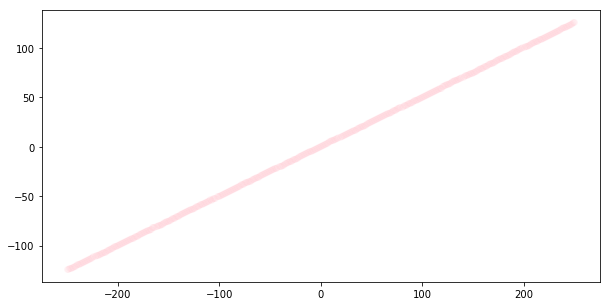

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, alpha=0.1, c='pink')
plt.show()


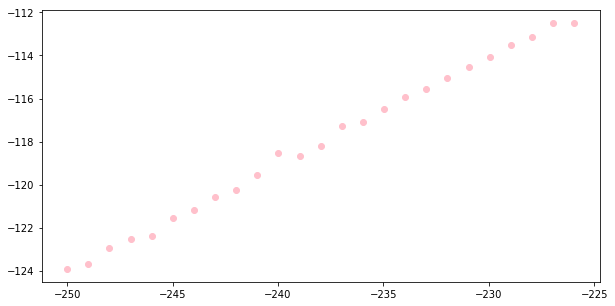

In [6]:
# Тут визуализируем небольшой кусочек выборки, чтобы было видно разброс
plt.figure(figsize=(10, 5))
plt.scatter(X[:25], Y[:25], alpha=1, c='pink')
plt.show()


Восстановим по выборке зависимость $y(x)$, считая, что зависимость имеет вид $y = kx+b$,и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.

In [7]:
from sklearn import metrics
from scipy.optimize import minimize


In [8]:
# Восстанавливает по x_arr и y_arr такие k и b, что metric минимальна, и считается, что зависимость должна иметь вид
# y = kx = b
def restore_dependence(x_arr, y_arr, metric):
    res = minimize(lambda cur_param: metric(y_arr, cur_param[0] * x_arr + cur_param[1]), (1, 1))
    return res.x[0], res.x[1]
    
k, b = restore_dependence(X, Y, metrics.mean_squared_error)


Визуализируем восстановленную прямую.

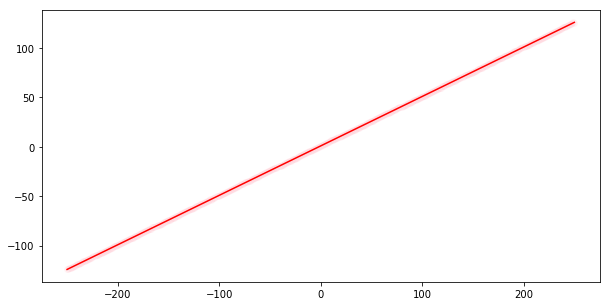

In [10]:
Y_restored = k * X + b

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, alpha=0.1, c='pink')
plt.plot(X, Y_restored, color="red")
plt.show()


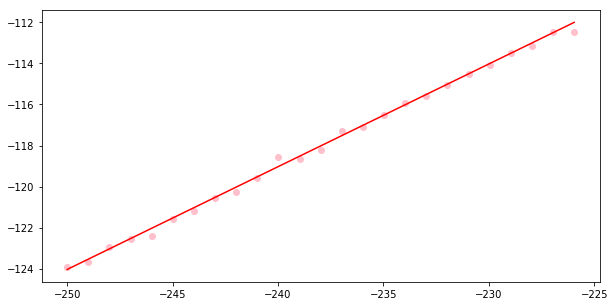

In [12]:
# ... и небольшую часть
plt.figure(figsize=(10, 5))
plt.scatter(X[:25], Y[:25], alpha=1, c='pink')
plt.plot(X[:25], Y_restored[:25], color="red")
plt.show()


Добавим теперь в выборку 75 точек, для которых $y = -1 + \varepsilon$, а $x$ принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке.

In [26]:
eps_emissions = sps.norm.rvs(loc=0, scale=0.2, size=75)
X_emissions = np.linspace(-250, 250, num=75)
Y_emissions = -np.ones(75) + eps_emissions

X_new = np.append(X, X_emissions)
Y_new = np.append(Y, Y_emissions)


По новой расширенной выборке снова попробуем восстановить зависимость $y(x) = kx + b$ двумя способами: минимизируя MSE и минимизируя MAE.

In [28]:
k_MSE, b_MSE = restore_dependence(X_new, Y_new, metrics.mean_squared_error)
k_MAE, b_MAE = restore_dependence(X_new, Y_new, metrics.mean_absolute_error)

Y_MSE = k_MSE * X_new + b_MSE
Y_MAE = k_MAE * X_new + b_MAE


Визуализируем полученные прямые.

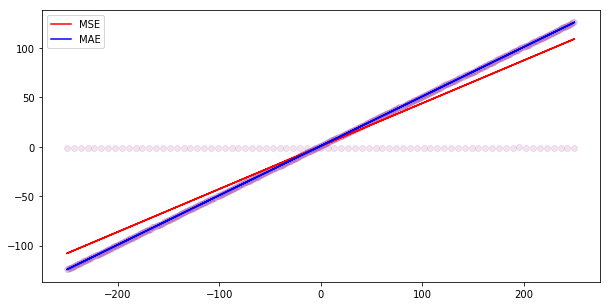

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(X_new, Y_new, alpha=0.1, c='purple')
plt.plot(X_new, Y_MSE, color="red", label="MSE")
plt.plot(X_new, Y_MAE, color="blue", label="MAE")
plt.legend()
plt.show()


На основе полученных графиков можно сделать следующий **вывод**: модель, использующая MAE является существенно более устойчивой к выбросам, чем модель, использующая MSE.
